# Concept Briefing


 # Improvement of Quality Education in Online mode.
Qualtiy of education in online mode has many problems. And sometimes biggest problem is network problem, and transmission as sometimes information transfered has noise which makes information is not unnderstandable. Also second biggest problem is student understanding. so my first proposal is to generate automatic notes of what tracher says in class and organise it to put it in notes format. 




for the first part we will put speech recognition and apply a text summarization bot on the speech recorded. after the notes are made best way to understand notes is having visuals with it, so all the lines will have it associated with bookmark in window, with some picture of class board on screen sharing which can be manual or ai based.



This concept whic are best suitable for the approach for above mentioned situation can be as followed:


*   Text capturing can be AI based which can automatically filter out speech recorded from noise and unwanted statements or unimportant conversations.
-Text can be summarized using online text summarizers present or we can use simple algorithms ai based to do so.
-we can then specify a time in video for all the lines that were recordes and start for a topic can be linked to the text.
*   List item


                            

# Requiremets

Here i will be telling you requirements you need for this program:-
1.   Pyaudio - pip install Pyaudio  
2.   SpeechRecognition-pip install speech recognition
3.Google speech api- pip install google-api-python-client
4.pip intall matplotlib 
5.pip install spicy
6.spacy- pip install spacy
7.pip install gensim
8.pip install jsonlib
9.pip install vosk
10.py-kaldi-asr





# Importing Modules

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [33]:
!pip install SpeechRecognition
import speech_recognition as sr


     |████████████████████████████████| 32.8 MB 1.2 MB/s 


In [34]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation 
from heapq import nlargest
import textwrap

In [35]:
import cv2
import math 
%matplotlib inline
from keras.preprocessing import image
from keras.utils import np_utils 
from skimage.transform import resize 

In [12]:
!pip install gensim
import gensim
import nltk
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', shuffle = True)
newsgroups_test = fetch_20newsgroups(subset='test', shuffle = True)

In [36]:
!pip install jsonlib
import wave
import json
!pip install vosk
from vosk import Model,KaldiRecognizer,SetLogLevel


  Using cached jsonlib-1.6.1.tar.gz (43 kB)
  ERROR: Failed building wheel for jsonlib
  Running setup.py clean for jsonlib
Failed to build jsonlib
    Running setup.py install for jsonlib ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-vooeqtx2/jsonlib_7fc71e2ebe3743bb89e9483ef0faecd1/setup.py'"'"'; __file__='"'"'/tmp/pip-install-vooeqtx2/jsonlib_7fc71e2ebe3743bb89e9483ef0faecd1/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-s_32vb9o/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/jsonlib Check the logs for full command output.


# Speech Recogniton and data collection 

In [37]:
recording=sr.Recognizer()

In [38]:
with sr.Microphone() as source: recording.adjust_for_ambient_noise(source)
print("Please Say something:")
audio = recording.listen(source)


Please Say something:


In [39]:
try:
  data=recording.recognize_google(audio)
except: 
  print('please speak something with text.')

In [40]:
frequency,audio=wavfile.read(source)
signal = source/np.power(2,15)
sugnal=source[:100]
time_label=1000*np.arange(0,len(signal),1)/float(frequency)

'frequency,audio=wavfile.read(source)\nsignal = source/np.power(2,15)\nsugnal=source[:100]\ntime_label=1000*np.arange(0,len(signal),1)/float(frequency)'

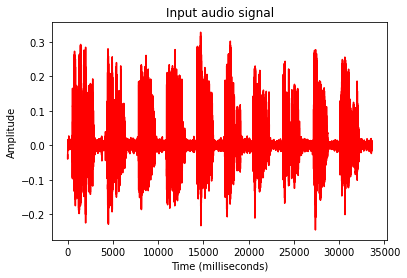

In [ ]:
plt.plot(time_label,signal,color='red')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

#Speech Sumarization 


In [31]:
def summarize(text, per):
    nlp = spacy.load('en_core_web_sm')
    doc= nlp(text)
    tokens=[token.text for token in doc]
    word_frequencies={}
    for word in doc:
        if word.text.lower() not in list(STOP_WORDS):
            if word.text.lower() not in punctuation:
                if word.text not in word_frequencies.keys():
                    word_frequencies[word.text] = 1
                else:
                    word_frequencies[word.text] += 1
    max_frequency=max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word]=word_frequencies[word]/max_frequency
    sentence_tokens= [sent for sent in doc.sents]
    sentence_scores = {}
    for sent in sentence_tokens:
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if sent not in sentence_scores.keys():                            
                    sentence_scores[sent]=word_frequencies[word.text.lower()]
                else:
                    sentence_scores[sent]+=word_frequencies[word.text.lower()]
    select_length=int(len(sentence_tokens)*per)
    summary=nlargest(select_length, sentence_scores,key=sentence_scores.get)
    final_summary=[word.text for word in summary]
    summary=''.join(final_summary)
    return summary

In [45]:
data="We’ll use SpaCy to import a pre-trained NLP pipeline to help interpret the grammatical structure of the text. This will allow us to identify the most common words that are often useful to filter out (i.e. STOP_WORDS) as well as the punctuation (i.e. punctuation). We’ll also use the nlargest function to extract a percentage of the most important sentences. Our algorithm will use the following steps:"

final_summary=summarize(data,0.5)

topic=input('Enter name of Topic')
with open('{}.txt'.format(topic),'w+') as f:
  f.write(topic+'\n')
  try:
      width=int(input('Enter formatting you want'))
      xw=textwrap.fill(final_summary,width)
      f.write(xw)
  except:
      f.write(final_summary)
    


Enter name of Topic Havard
Enter formatting you want34


#Linking text to video approach




The main way to link a video bookmark to a text can be done by first detecting important topics in text detected in above section, then find where that topic is applied, and further link it to a time-stamp in a video.

To take notes from text we need important topics and then add particular text. This thing  is under extensive resarch and is not quite applied yet. Creating an optimized code for it will take some time. So this code works with the help of human intervention where the topics are given by human and then we find the particular topic in video and find its timestamp.

Refrenced from  the research on the topic is given below and Here I will be giving my basic approach regarding this topic:-
1.   First we will detect the text and find the most emphasised words, most important words.
2.   Apply AI to differentiate between common, unseful words from actually important word.
3. Then we will find these important keywords from text and find them in video and there time stamps.

Now the biggest problem is to ectract the time stamps from a video which will help in making effective notes and save a lot of time based on how much time a student waste on finding the actual content he/she wants to study. 

Here we will first need to create a searchable video archive which will enable us to look for key words in the video.

Once the key word in the video is identified we can easily put time stamp for that keyword in out documents.






# Finding Important Topics

Below I have tried to apply the algorithm in the above mentioned section.


---

Here I will be using NLP to find keywords from the above described summary of  the text.
We will be using LDA in this process.

---
I am using newspaper data set from sklearn to train my lda model and then use it to predict words from the summary i recieved.



In [2]:
def lemmatize_summary(text):
  return stemmer.stem(WordnetLemmatizer().lemmatize(text,pos='v'))

In [3]:
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result


In [46]:
processed_docs=lemmatize_summary(newsgroups_train)
processed_docs=preprocess(processed_docs)

In [47]:
dictionary = gensim.corpora.Dictionary(processed_docs)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

Running LDA model once the preporcessing is done

In [49]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, num_topics = 8,id2word = dictionary,passes = 10, workers = 2)
predictions=lda_model.predict(final_summary)

What Lda does is provide you with important words from the given text hence it is on human that how to we name this group of words. As we have already taken the name of the topic as input. We can add a header important words with important words in it.

In [52]:
important_words=predictions
with open('{}.txt'.format(topic),'a+') as f:
  f.write('\n'+'\n')
  f.write('Impoertant Keyword \n')
  f.write(important_words)


#Getting time stamps


In this section we will be working towards getting the timestamp from the audio, which in in synchrous with video in almost all the online learning platform. we will take the important_words we extracted in the previous class and then use them to find the audio time stamp in it and put it in video.


In [22]:
class Word:
  def __init__(self,dict):
    self.conf = dict["conf"]
    self.end=dict['end']
    self.start=dict['start']
    self.word=sict['word']

  def to_string(self):
    return "{:20} from {:.2f} sec to {:.2f} sec, confidence is {:.2f}%".format(
            self.word, self.start, self.end, self.conf*100)

The above coding cell we will be putting all words in a fomat that is suitable for generating time stamps.

In [ ]:
model_path = "models/vosk-model-en-us-0.21"

model = Model(model_path)
wf = recording
rec = KaldiRecognizer(model, wf.getframerate())
rec.SetWords(True)

# get the list of JSON dictionaries
results = []
# recognize speech using vosk model
while True:
    data = wf.readframes(4000)
    if len(data) == 0:
        break
    if rec.AcceptWaveform(data):
        part_result = json.loads(rec.Result())
        results.append(part_result)
part_result = json.loads(rec.FinalResult())
results.append(part_result)

# convert list of JSON dictionaries to list of 'Word' objects
list_of_Words = []
for sentence in results:
    if len(sentence) == 1:
        # sometimes there are bugs in recognition 
        # and it returns an empty dictionary
        # {'text': ''}
        continue
    for obj in sentence['result']:
        w = custom_Word.Word(obj)  # create custom Word object
        list_of_Words.append(w)  # and add it to list

wf.close()  # close audiofile

# output to the screen
with open(topic+'.txt','a') as f:
  f.write('\n Time stamps are as follows \n')
  for word in list_of_words:
    f.write(word+'\n')
    



All the Notes and Time-stamps are uploaded in the file namw which was takes as input earlier.

Since this code is still under development and is suitable for only a few amount of conditions.

# Refrences




1.   Speech recogniton- https://prutor.ai/ai-with-python-speech-recognition/
2.   Text Summarization- https://www.activestate.com/blog/how-to-do-text-summarization-with-python/
3.Research on making notes- https://medium.com/swlh/getting-ai-to-take-my-notes-for-me-ed66aacde185
4. NLP processing- https://towardsdatascience.com/nlp-extracting-the-main-topics-from-your-dataset-using-lda-in-minutes-21486f5aa925
5.speech recognition with time stamp- https://towardsdatascience.com/speech-recognition-with-timestamps-934ede4234b2



Thankyou and have a nice day!



Priyam Jain

20BAI10087(VIT BHOPAL UNIVERSITY)

AI and ML